# <center>Proyecto 1</center>

#### ***Nombre***: Jose Eduardo Calderon Lopez
#### ***Carnet***: 14001764

<br>
<hr>
<br>

## Imports necesarios para el proyecto

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Load inicial de datos

In [ ]:
# Complete set
dataset = np.load('proyecto_training_data.npy')


In [20]:
filas = len(dataset)

# Training set
trainingData = dataset[:int(filas*0.8)]

# Validation set
validationData = dataset[int(filas*0.8):]

## Análisis exploratorio

In [277]:
cols = 6

arrMeans = np.zeros(cols)
arrMaxValues = np.zeros(cols)
arrMinValues = np.zeros(cols)
arrStdDevs = np.zeros(cols)
arrRanges = np.zeros(cols)

for i in range(0,cols):
    arrMeans[i] = round(np.nanmean(trainingData[:,i]), 5)
    arrMaxValues[i] = round(np.nanmax(trainingData[:,i]), 5)
    arrMinValues[i] = round(np.nanmin(trainingData[:,i]), 5)
    arrStdDevs[i] = round(np.nanstd(trainingData[:,i]), 5)
arrRanges = list(map(lambda value1, value2: value1-value2, arrMaxValues, arrMinValues))

In [270]:
def printAnalysis(index):
    print(f"Media: {arrMeans[index]}")
    print(f"Valor máximo: {arrMaxValues[index]}")
    print(f"Valor mínimo: {arrMinValues[index]}")
    print(f"Rango: {arrRanges[index]}")
    print(f"Desviación estándar: {arrStdDevs[index]}")

### Sale Price ($)

In [271]:
printAnalysis(0)

Media: 180590.2774
Valor máximo: 755000.0
Valor mínimo: 34900.0
Rango: 720100.0
Desviación estándar: 78781.95108


### Overall Quality

In [272]:
printAnalysis(1)

Media: 6.10103
Valor máximo: 10.0
Valor mínimo: 1.0
Rango: 9.0
Desviación estándar: 1.37744


### First Floor sq ft

In [273]:
printAnalysis(2)

Media: 1156.32363
Valor máximo: 3228.0
Valor mínimo: 334.0
Rango: 2894.0
Desviación estándar: 373.62033


### Total Rooms

In [274]:
printAnalysis(3)

Media: 6.48545
Valor máximo: 14.0
Valor mínimo: 2.0
Rango: 12.0
Desviación estándar: 1.60845


### Construction date

In [275]:
printAnalysis(4)

Media: 1971.4512
Valor máximo: 2010.0
Valor mínimo: 1875.0
Rango: 135.0
Desviación estándar: 29.93888


### Lot Frontage

In [276]:
printAnalysis(5)

Media: 69.94699
Valor máximo: 313.0
Valor mínimo: 21.0
Rango: 292.0
Desviación estándar: 23.46595


## Histogramas de variables

In [110]:
def drawHistogram(column, title, xlabel, ylabel, color):
    sb.set(style="darkgrid")
    sb.histplot(trainingData[:,column], color=color)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Sale Price

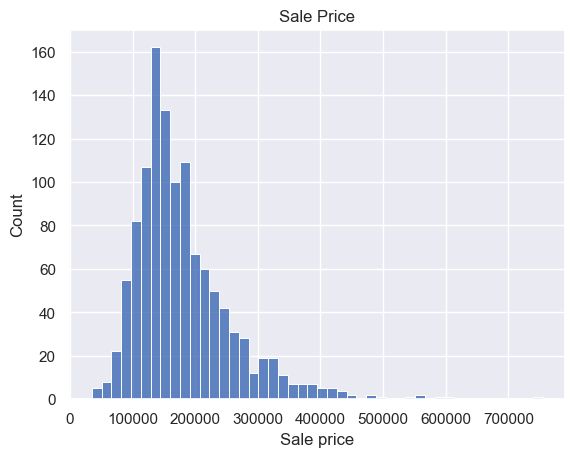

In [111]:
drawHistogram(0, "Sale Price", "SalePrice", "Count", "#3160b0")

### Overall Quality

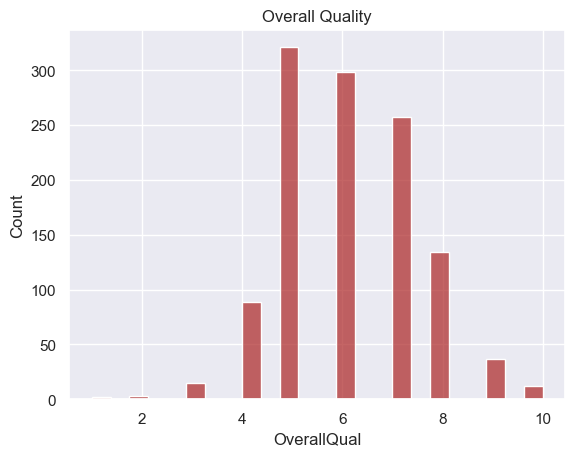

In [114]:
drawHistogram(1, "Overall Quality", "OverallQual", "Count", "#b03131")

### First Floor sq ft

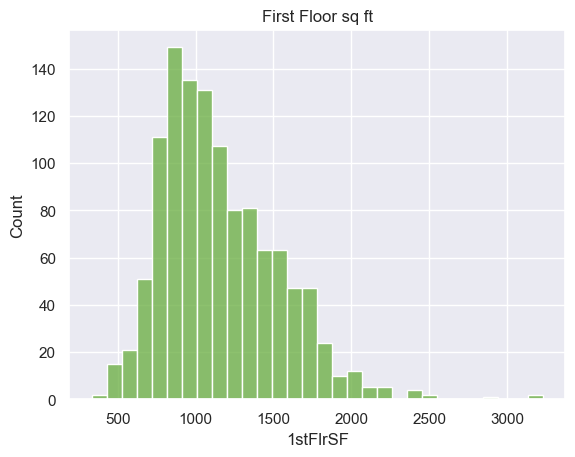

In [115]:
drawHistogram(2, "First Floor sq ft", "1stFlrSF", "Count", "#67ad3e")

### Total Rooms

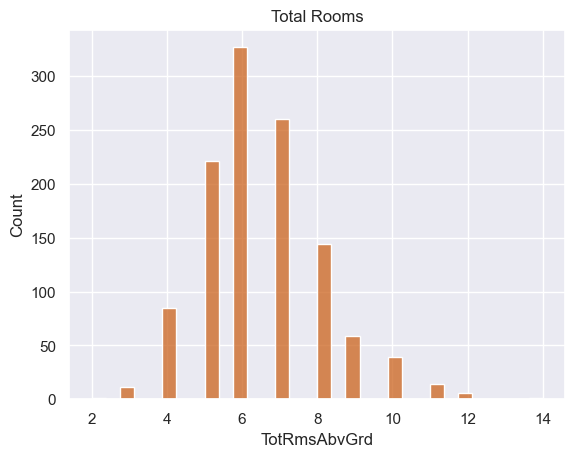

In [123]:
drawHistogram(3, "Total Rooms", "TotRmsAbvGrd", "Count", "#cc631d")

### Construction date

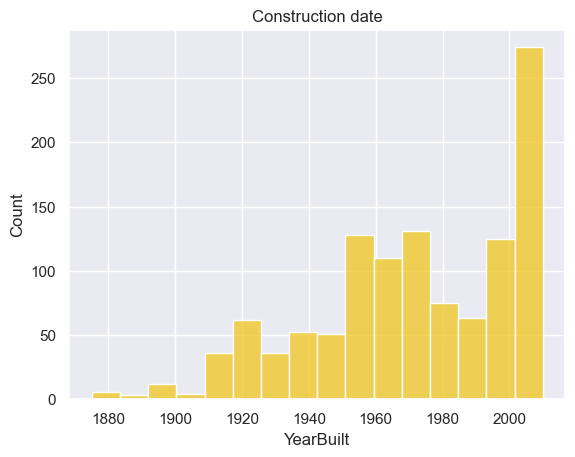

In [125]:
drawHistogram(4, "Construction date", "YearBuilt", "Count", "#f2c51f")

### Lot Frontage

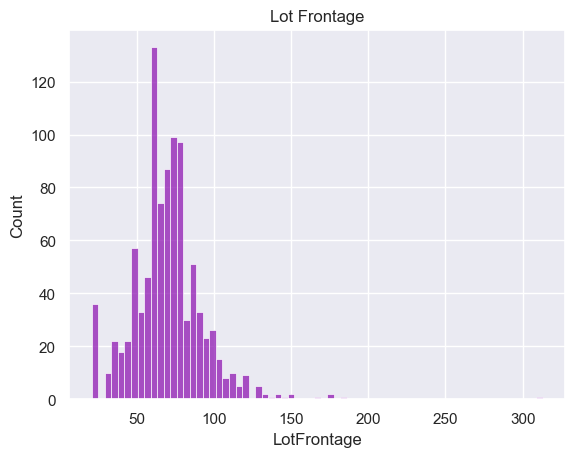

In [124]:
drawHistogram(5, "Lot Frontage", "LotFrontage", "Count", "#8f19b3")

## Correlaciones

In [220]:
saleprice = trainingData[:,0]
overallquality = trainingData[:,1]
firstfloorsqft = trainingData[:,2]
totalrooms = trainingData[:,3]
yearbuilt = trainingData[:,4]
lotfrontage = trainingData[:,5]

In [264]:
def coefCorr(x,y):
    # return np.corrcoef(x,y)[0][1]
    return np.ma.corrcoef(np.ma.masked_invalid(x),np.ma.masked_invalid(y))[0][1]

def printxyr(labelx, labely, r):
    print(f"x = {labelx}")
    print(f"y = {labely}")
    print(f"r = {r}\n")
    
# def printScatterPlot(x,y):
#     print("x,y\n")

def printCorrelations(column, name):
    r1 = round(coefCorr(column, saleprice), 5)
    r2 = round(coefCorr(column, overallquality), 5)
    r3 = round(coefCorr(column, firstfloorsqft), 5)
    r4 = round(coefCorr(column, totalrooms), 5)
    r5 = round(coefCorr(column, yearbuilt), 5)
    r6 = round(coefCorr(column, lotfrontage), 5)

    printxyr(name, "Sale Price", r1)
    
    printxyr(name, "Overall Quality", r2)
    
    printxyr(name, "First Floor sq ft", r3)
    
    printxyr(name, "Total Rooms", r4)
    
    printxyr(name, "Year built", r5)
    
    printxyr(name, "Lot Frontage", r6)
    

### Sale Price

In [265]:
printCorrelations(saleprice, "Sale Price")

x = Sale Price
y = Sale Price
r = 1.0

x = Sale Price
y = Overall Quality
r = 0.79399

x = Sale Price
y = First Floor sq ft
r = 0.61629

x = Sale Price
y = Total Rooms
r = 0.56471

x = Sale Price
y = Year built
r = 0.53417

x = Sale Price
y = Lot Frontage
r = 0.36329



### Overall Quality

In [229]:
printCorrelations(overallquality, "Overall Quality")

x = Overall Quality
y = Sale Price
r = 0.79399

x = Overall Quality
y = Overall Quality
r = 1.0

x = Overall Quality
y = First Floor sq ft
r = 0.46941

x = Overall Quality
y = Total Rooms
r = 0.44429

x = Overall Quality
y = Year built
r = 0.56731

x = Overall Quality
y = Lot Frontage
r = 0.24242



### First Floor sq ft

In [230]:
printCorrelations(firstfloorsqft, "First Floor sq ft")

x = First Floor sq ft
y = Sale Price
r = 0.61629

x = First Floor sq ft
y = Overall Quality
r = 0.46941

x = First Floor sq ft
y = First Floor sq ft
r = 1.0

x = First Floor sq ft
y = Total Rooms
r = 0.40932

x = First Floor sq ft
y = Year built
r = 0.29207

x = First Floor sq ft
y = Lot Frontage
r = 0.41739



### Total Rooms

In [235]:
printCorrelations(totalrooms, "Total Rooms")

x = Total Rooms
y = Sale Price
r = 0.56471

x = Total Rooms
y = Overall Quality
r = 0.44429

x = Total Rooms
y = First Floor sq ft
r = 0.40932

x = Total Rooms
y = Total Rooms
r = 1.0

x = Total Rooms
y = Year built
r = 0.12291

x = Total Rooms
y = Lot Frontage
r = 0.34101



### Construction date

In [232]:
printCorrelations(yearbuilt, "Year Built")

x = Year Built
y = Sale Price
r = 0.53417

x = Year Built
y = Overall Quality
r = 0.56731

x = Year Built
y = First Floor sq ft
r = 0.29207

x = Year Built
y = Total Rooms
r = 0.12291

x = Year Built
y = Year built
r = 1.0

x = Year Built
y = Lot Frontage
r = 0.12147



### Lot Frontage

In [246]:
printCorrelations(lotfrontage, "Lot Frontage")

x = Lot Frontage
y = Sale Price
r = 0.36329

x = Lot Frontage
y = Overall Quality
r = 0.24242

x = Lot Frontage
y = First Floor sq ft
r = 0.41739

x = Lot Frontage
y = Total Rooms
r = 0.34101

x = Lot Frontage
y = Year built
r = 0.12147

x = Lot Frontage
y = Lot Frontage
r = 1.0

